# Crossfit athletes results exploration

## Preliminary Wrangling and Cleaning

The dataset contains information about crossfit athletes that were competing in 2015 year. The original dataset was taken from here https://data.world/bgadoci/crossfit-data. The original dataset had information about 423k athletes with 26 characteristics including region, team, results, and other information. It also contained a lot of null values (NaN, NA, -, 0 etc.). Since I wanted to have the complete information about every athlete in my dataset, I decided to keep only those rows that doesn't contain null values. I also decided to keep only information about athlete's results and his parameters, such as age, height, weight and training style. In this project, I want to explore how athlete's parameters affect their results. 

## Dataset description

Here is the final set of columns in my dataset:

- **name** : Athlete's name

Athlete Parameteres:
- **gender** : Athlete's gender
- **age** : Athlete's age
- **height** : Athlete's height
- **weight** : Athlete's weight
- **background** : Athlete's sport background (if any)
- **schedule** : Athlete's workout schedule
- **howlong** : Athlete's crossfit experience

Athlete's Results:
- **candj** : Personal record in Clean and Jerk (weightlifting)
- **snatch** : Personal record in Snatch (weightlifting)
- **deadlift** : Personal record in Deadlift 
- **backsq** : Personal record in Back Squat
- **pullups** : Maximum unbroken pull-ups



In [51]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Loading dataset:

In [52]:
athletes = pd.read_csv('athletes_complete.csv')
athletes.head()

,name,gender,age,height,weight,candj,snatch,deadlift,backsq,pullups,background,schedule,howlong
0,Mike Abgarian,Male,31,65,150,290,225,465,405,81,Pro or college sports,Multiple workouts in a day,2-4 years
1,Erik Acevedo,Male,30,71,200,235,175,385,315,35,Pro or college sports,One or multiple,1-2 years
2,Richard Ablett,Male,28,70,176,187,134,335,254,27,No athletic background,One or multiple,2-4 years
3,Joji Abasolo,Male,39,66,158,185,135,385,285,31,"Some sport (youth, school, recreational)",Multiple workouts in a day,1-2 years
4,Jerry Abadom,Male,44,72,214,265,198,551,485,37,Pro or college sports,One or multiple,1-2 years


In [53]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21105 entries, 0 to 21104
Data columns (total 13 columns):
name          21105 non-null object
gender        21105 non-null object
age           21105 non-null int64
height        21105 non-null int64
weight        21105 non-null int64
candj         21105 non-null int64
snatch        21105 non-null int64
deadlift      21105 non-null int64
backsq        21105 non-null int64
pullups       21105 non-null int64
background    21105 non-null object
schedule      21105 non-null object
howlong       21105 non-null object
dtypes: int64(8), object(5)
memory usage: 2.1+ MB


The "gender", "background", "schedule" and "howlong" columns should be categorical. I'll convert them now.

In [54]:
# converting gender (unordered)
genders = ['Male', 'Female']
vclasses = pd.api.types.CategoricalDtype(ordered=False, categories=genders)
athletes['gender'] = athletes['gender'].astype(vclasses)

# converting gender (ordered from no background to pro)
backgrounds = ['No athletic background', 'Some sport (youth, school, recreational)', 'Pro or college sports']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=backgrounds)
athletes['background'] = athletes['background'].astype(vclasses)

# converting schedules (ordered from one to multiple workouts per day)
schedules = ['One workout a day', 'One or multiple', 'Multiple workouts in a day']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=schedules)
athletes['schedule'] = athletes['schedule'].astype(vclasses)

# converting howlong (ordered from less than year to 4+ years)
howlongs = ['Less than 1 year', '1-2 years', '2-4 years', '4+ years']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=howlongs)
athletes['howlong'] = athletes['howlong'].astype(vclasses)

In [55]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21105 entries, 0 to 21104
Data columns (total 13 columns):
name          21105 non-null object
gender        21105 non-null category
age           21105 non-null int64
height        21105 non-null int64
weight        21105 non-null int64
candj         21105 non-null int64
snatch        21105 non-null int64
deadlift      21105 non-null int64
backsq        21105 non-null int64
pullups       21105 non-null int64
background    21105 non-null category
schedule      21105 non-null category
howlong       21105 non-null category
dtypes: category(4), int64(8), object(1)
memory usage: 1.5+ MB


Now it's fine. 

We have 8 numeric variables (3 for parameters and 5 for results) and 4 categorical variables (all of them describe athlete's parameters and style)

The main features of interest are the results:
- **pullups** - base gymnastics movement
- **snatch + clean and jerk** - two movements from weightlifting
- **deadlift + backsquat** - two movements from powerlifting

On the other hand, there are the parameters that may affect those results:
- **age, gender, height, weight** - physical parameters of an athlete
- **background, schedule, howlong** - where the athlete came from, how often and how long does he train

## Univariate Exploration


### Results distribution

Starting from the distribution of maximum pullups. Since all results are numeric, I'll plot their distributions as histograms

In [56]:
athletes.pullups.describe()

count    21105.000000
mean        30.510258
std         15.168022
min          1.000000
25%         20.000000
50%         30.000000
75%         40.000000
max         98.000000
Name: pullups, dtype: float64

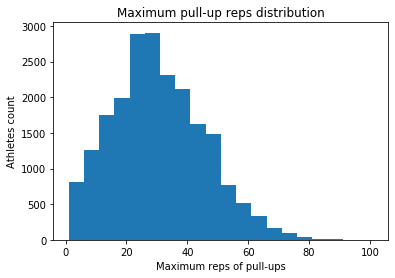

In [57]:
bins = np.arange(1, 98 + 5, 5)
plt.hist(data = athletes, x='pullups', bins=bins)
plt.xlabel('Maximum reps of pull-ups')
plt.ylabel('Athletes count')
plt.title('Maximum pull-up reps distribution');

It's almost a normal distribution. Most of the data lies between 10 and 50 reps

Now I want to see the distribution of weightlifting results plotted together as subplots. Probably it will make sense to sum up these columns into one.

In [58]:
athletes.snatch.describe()

count    21105.000000
mean       162.067709
std         46.819431
min         15.000000
25%        130.000000
50%        165.000000
75%        195.000000
max        375.000000
Name: snatch, dtype: float64

In [68]:
athletes.candj.describe()

count    21105.000000
mean       212.333760
std         56.377838
min         17.000000
25%        175.000000
50%        215.000000
75%        255.000000
max        428.000000
Name: candj, dtype: float64

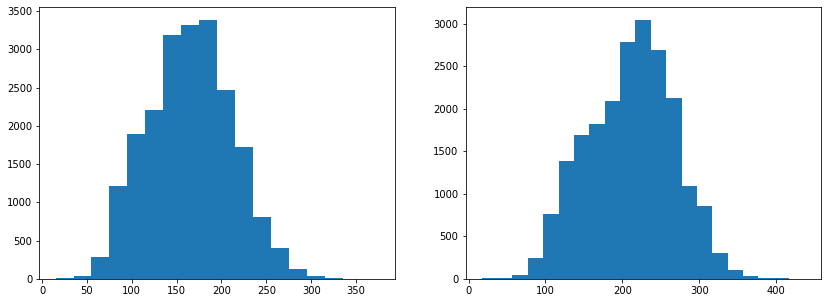

In [115]:
snatch_bins = np.arange(15, 375 + 20, 20)
clean_bins = np.arange(17, 428 + 20, 20)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,5))
ax1.hist(data = athletes, x='snatch', bins=snatch_bins)
ax2.hist(data = athletes, x='candj', bins=clean_bins);

The distributions look almost equal. So I think it makes sense to add one column called "weightlifting", that contains sum of snatch and C&J results.

In [71]:
athletes['weightlifting'] = athletes['snatch'] + athletes['candj']

Now, I want to look at some athlete parameters distributions. The most interesting are background and how long they do crossfit. 

In [110]:
athletes['background'].value_counts()

Some sport (youth, school, recreational)    12296
Pro or college sports                        6480
No athletic background                       2329
Name: background, dtype: int64

Since background only has 3 different values, the best kind of plot is pie chart.

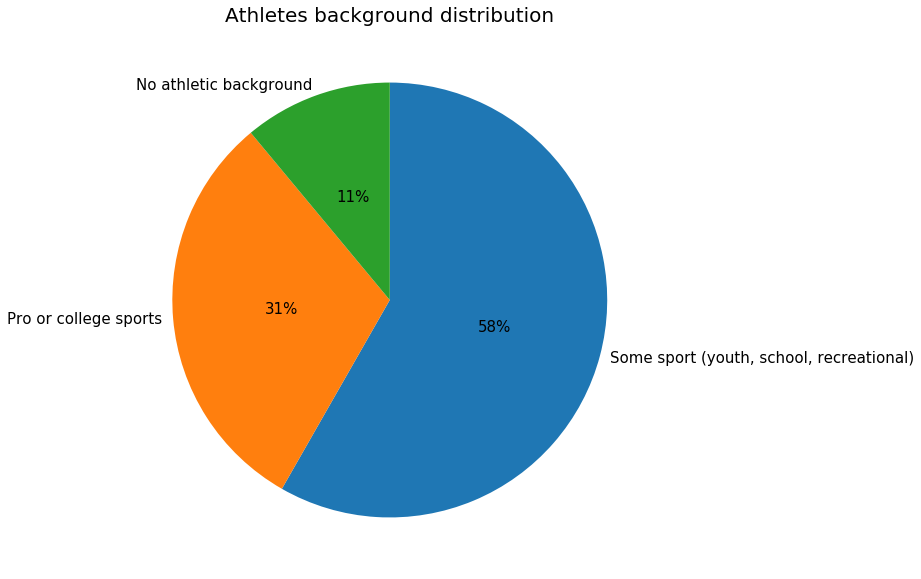

In [109]:
plt.figure(figsize=(10,10))

values = athletes['background'].value_counts()
labels = athletes['background'].value_counts().keys().values

plt.pie(values, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.05, 
        counterclock=False, startangle = 90,textprops={'fontsize': 15})
plt.title('Athletes background distribution', fontsize=20);

Most athletes had some sports in their life, some were pros and only 11% had no athletic background.

In [112]:
athletes['howlong'].value_counts()

2-4 years           7343
1-2 years           7067
Less than 1 year    3491
4+ years            3204
Name: howlong, dtype: int64

For this parameter, I'll make a bar chart.

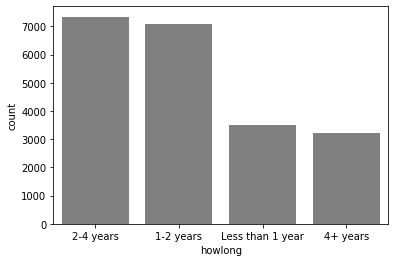

In [114]:
orders = athletes['howlong'].value_counts().index
sb.countplot(data=athletes, x='howlong', color='grey', order=orders);

Here is an interesting situation. If this variable was numeric, it would probably have normally distributed values. Most of the athletes have 1-4 years of experience. Some are rookies(1 year or less) and some are very experienced(4+ years).

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!